### Set up the working directory and load the libraries

In [60]:
# Set working directory to the github folder:
setwd("G:\\My Drive\\SDM_China")
# Load the libraries:
library(rgdal)
library(raster)
library(RColorBrewer)
library(maptools)
require(XML)
library(classInt)

In [57]:
nn=1

In [58]:
#### Set working directory:
#### Load data useful for visualisation:
# Get country borders
borders <- readOGR(dsn = "raw_data\\ne_10m_admin_0_countries", layer = "ne_10m_admin_0_countries")
# Get continents borders
continents <- readOGR(dsn = "raw_data\\continent_shapefile", layer = "continent")
# Get a nice basemap from: https://www.naturalearthdata.com/downloads/
basemap <- brick("raw_data\\NE2_50m_SR_W\\NE2_50M_SR_W\\NE2_50M_SR_W.tif")
### Add the map with rivers
rivers <- readOGR(dsn = "raw_data\\majorrivers_0_0", layer = "MajorRivers")

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\ne_10m_admin_0_countries", layer: "ne_10m_admin_0_countries"
with 255 features
It has 94 fields
Integer64 fields read as strings:  POP_EST NE_ID 
OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\continent_shapefile", layer: "continent"
with 8 features
It has 1 fields
OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\majorrivers_0_0", layer: "MajorRivers"
with 98 features
It has 4 fields


### Load data with fagopyrum presence in South East Asia

In [59]:
### Fagopyrum locations for China:
#Import the table for Fagopyrum occurance records, based on (Hunt et al., 2017) and further evidence from the literature
loc_ea <- read.csv("raw_data//fagopyrum_east_asia.csv")
# Trnsforma data into a spatial points data.frame
coordinates(loc_ea)<-~longitude+latitude

No.,Sample_type,Quantity,Sediment_type_pollen_cores,Site_section_name,Site_short,Province,Country,Taxonomic_identification,Dating_method,Dating_result,Reference,lon,lat,altitude..masl.,location_source,start_date,end_date
1,Pollen sequence,NA,Loess-palaeosol,Xindian section,Xindian,Shaanxi,China,Fagopyrum. sp,AMS 14C and OSL,from 5500 cal BP,Li et al. 2009,107°48'E,34°23'N,608.00,Li et al. 2009,5500,0
2,Pollen sequence,NA,Loess-palaeosol,Beizhuangcun section,Beizhuangcun,Shaanxi,China,Fagopyrum. sp,Stratigraphic comparison,from 5000 cal BP,Shang and Li 2010,109°32'E,34°21'N,519.00,Shang and Li 2010,5000,0
3,Pollen sequence,NA,Alluvial sediment,WangXianggou site,WangXianggou,Inner Mongolia,China,Fagopyrum. sp,AMS 14C,from 4700 cal BP,Li et al. 2006,119°55'E,42°04'N,751.00,Li et al. 2006,4700,0
4,Pollen sequence,NA,Loess-palaeosol with cultural layers,Xishanping site,Xishanping,Gansu,China,Fagopyrum. sp,AMS 14C,from 4600 cal BP,"Li et al. 2007, Cao et al 2019",105°32'41''E,34°33'50''N,1330.00,Li et al. 2007,4600,0
5,Pollen sequence,NA,Alluvial sediment,CM97(Chongming island)/ Changjiang River_1997,CM97 (Chongming island),Shanghai,China,Fagopyrum. sp,AMS 14C,4500 cal BP,Yi et al. 2003b; Cao et al. 2013,121°23'E,31°37'N,2.48,Yi et al. 2003b,4500,4500
6,Pollen sequence,NA,Loess-palaeosol,Jingbian section,Jingbian,Shaanxi,China,Fagopyrum. sp,Stratigraphic comparison,4000 cal BP,Cheng and Jiang 2011; Jiang et al. 2013,108.9°E,37.5°N,1688.00,Jiang et al. 2013,4000,4000


Formal class 'SpatialPointsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	40 obs. of  18 variables:
  .. ..$ No.                       : int [1:40] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ Sample_type               : Factor w/ 3 levels "Charred seeds",..: 2 2 2 2 2 2 2 2 2 2 ...
  .. ..$ Quantity                  : int [1:40] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ Sediment_type_pollen_cores: Factor w/ 10 levels "","0","Alluvial sediment",..: 6 6 3 7 3 6 6 3 5 3 ...
  .. ..$ Site_section_name         : Factor w/ 37 levels "Bayantala site",..: 33 2 31 34 7 17 10 3 32 12 ...
  .. ..$ Site_short                : Factor w/ 37 levels "Bayantala","Beizhuangcun",..: 33 2 31 34 7 17 10 3 32 12 ...
  .. ..$ Province                  : Factor w/ 17 levels "","Beijing","Dongbei pingyuan",..: 11 11 6 4 13 11 11 7 17 12 ...
  .. ..$ Country                   : Factor w/ 3 levels "China","India",..: 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ Taxonomic_identification  : Factor w/ 8 levels "

In [39]:
nn=1
path2image<-paste("images//01_",nn,"_Fagopyrum_in_China.png",sep="")
png(path2image, units="in", width=12, height=6.72, res=1200)
#Define extent for plotting and cropp all the shapefiles that will be put on the top
ext <- c(65,140,15,57 )
rivers_cropped <- crop(rivers, ext)
borders_cropped<-crop(borders, ext)
plotRGB(basemap, interpolate = TRUE,ext=ext,mar=c(0,0,0,0),bg=rgb(255,255,255,alpha=1))
plot(rivers_cropped, add=TRUE, col="dodgerblue",lwd=1,main="Fagopyrum locations in China")
plot(borders_cropped, add=TRUE, border="grey50", lwd=1)
#points(d)

d<-subset(loc_ea,loc_ea$start_date>=000)
points(d[as.character(d$Sample_type)=="Pollen sequence",],pch=21, bg="pink",col="red",lwd=3)
points(d[as.character(d$Sample_type)=="Charred seeds",],pch=17, bg="black",col="black",lwd=3)
text(d[as.character(d$Sample_type)=="Charred seeds",],labels=d[as.character(d$Sample_type)=="Charred seeds",]$Site_short, 
    cex= 1,pos=c(3,2,4,4,1,4,4,4,4,2,4,3))
points(d[as.character(d$Sample_type)=="Starch grains",],pch=22, bg="orange",col="brown",lwd=3)
text(d[as.character(d$Sample_type)=="Starch grains",],labels=d[as.character(d$Sample_type)=="Starch grains",]$Site_short, 
    cex= 1,pos=c(2,2))
text(85,60 , "Fagopyrum in China", pos = 4, cex=2,col="black")
legend(x='bottomright', legend = c("Pollen", "Charred seeds","Starch grains"), inset=c(0.01,0.01), cex=1.5,
       pch=c(21,24,22), col=c("red","black","brown"), pt.bg=c("pink","black","orange"))
dev.off()

png 
  2

## Load all sites with pollen/archaeological sites

In [42]:
### Import additional pollen data from pollen database for Asia provided by Xianyong Cao, used in the paper (Cao et al., 2019):
cao2015<-read.csv("raw_data//FossilPollenDatabasePercentageAsian.csv")
### Transform the data into a Spatial Points data frame:
coordinates(cao2015)<-~Longitude+Latitude
#Create a subset of records where fagopyrum has been identified:
cao2015_fagopyrum <- subset(cao2015, cao2015$Fagopyrum>0)

# Import additional data for northern China & Syberia provided alongside the paper (Cao et al., 2019)
cao2019 <-read.table("raw_data\\CaoX-etal_2019\\datasets\\Siberia_pollen_percentages.tab", header = TRUE, sep = "\t", row.names=NULL,skip=303)
cao2019<-subset(cao2019, !is.na(cao2019$Longitude))
coordinates(cao2019)<-~Longitude+Latitude
cao2019_poly<-subset(cao2019,cao2019$Polygonacea>0)

### Open the kmz rice database (archaeological sites with rice):
### This unzips the kmlfile and saves it in the database
#kmlfile <- unzip(zipfile = "raw_data\\journal.pone.0137024.s001.kmz",exdir   = "raw_data\\rice_database")
### This imports the rice database into R:
rice<-readOGR("raw_data\\rice_database\\Rice Archaeological Database.kml")

### Import the database from d'Guedes:
gb2018 <-read.csv("raw_data\\guedesbocinsky2018_crops_across_eurasia.csv")
gb2018<-subset(gb2018,!is.na(gb2018$Longitude))
coordinates(gb2018)<-~Longitude+Latitude

## Import archaeological sties from China
hosner2016 <-read.table("raw_data\\Hosner_2016.tab", header = TRUE, sep = "\t", row.names=NULL,skip=20)
coordinates(hosner2016)<-~Longitude+Latitude

### Import archaeological sites from Shaanxi
#Unzip all km files
#files<-list.files(path="raw_data\\SHAANXI DISCRETE KMZ\\",pattern='kmz$',full.names=TRUE)
#shaanxi <- lapply(files, function(file){unzip(file,exdir=paste("raw_data\\shaanxi\\",gsub(".*KMZ\\\\s*|.kmz.*", "",file),sep=""))})
sh_allsites <- lapply(shaanxi[c(-3,-14,-17,-25,-48,-52)],readOGR)
shaanxi<-bind(sh_allsites)

ID,Country,Province,Site,Altitude,Cal.yr.BP,Fagopyrum,Polygonum,Polygonaceae..other.
1,Mongolia,NA,Achit Nur Lake,1435,353.2,0,0,0
1,Mongolia,NA,Achit Nur Lake,1435,1239.3,0,0,0
1,Mongolia,NA,Achit Nur Lake,1435,2763.2,0,0,0
1,Mongolia,NA,Achit Nur Lake,1435,2803.5,0,0,0
1,Mongolia,NA,Achit Nur Lake,1435,3207.5,0,0,0
1,Mongolia,NA,Achit Nur Lake,1435,3541.4,0,0,0


Formal class 'SpatialPointsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	97 obs. of  9 variables:
  .. ..$ ID                  : int [1:97] 29 29 29 29 29 29 29 29 29 29 ...
  .. ..$ Country             : Factor w/ 6 levels "China","India",..: 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ Province            : Factor w/ 32 levels "","Anhui","Beijing",..: 15 15 15 15 15 15 15 15 15 15 ...
  .. ..$ Site                : Factor w/ 471 levels "11-CH-12A Lake",..: 59 59 59 59 59 59 59 59 59 59 ...
  .. ..$ Altitude            : num [1:97] 2 2 2 2 2 2 2 2 2 2 ...
  .. ..$ Cal.yr.BP           : num [1:97] 357 557 722 879 1000 ...
  .. ..$ Fagopyrum           : num [1:97] 3.57 1.47 7.81 2.86 1.64 ...
  .. ..$ Polygonum           : num [1:97] 0 0 0 0 0 0 1.49 0 4.35 7.5 ...
  .. ..$ Polygonaceae..other.: num [1:97] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ coords.nrs : int [1:2] 6 5
  ..@ coords     : num [1:97, 1:2] 121 121 121 121 121 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : c

[1] 9

[1] Changjiang River_1997 Changjiang River_1998 Charisu              
[4] Luochuan              Shayema Lake          Wangjiadian          
[7] Wangyanggou           Sihailongwan Lake     Tso Moriri Lake      
471 Levels: 11-CH-12A Lake Achit Nur Lake Achit Nuur Adycha River ... Zoige_RM

In [238]:
nn=2
path2image<-paste("images//_0",nn,"_absence_records.png",sep="")
png(path2image, units="in", width=6, height=4, res=600)

#### Plot data quality on the map with countries boarders:
borders_cropped <- crop(borders, c(40,190,-10,80))
par(mfrow=c(2,2), mar=c(0,2,2,2), oma=c(2,0,2,0), xpd=NA)
plot(borders_cropped,border="grey80", lwd=1,col="lightyellow", main="Pollen cores",cex.main=0.8)
points(cao2015,col="black",pch=16,cex=0.7)
points(cao2019,col="red",pch=16,cex=0.4)

plot(borders_cropped,border="grey80", lwd=1,col="lightyellow", main="Archaeological sites in China",cex.main=0.8)
points(hosner2016,col="black",pch=16,cex=0.2)
points(shaanxi,col="red",pch=16,cex=0.1)

plot(borders_cropped,border="grey80", lwd=1,col="lightyellow", main="Archaeological sites\nwith archaebotanical remains",
    cex.main=0.8)
points(gb2018,col="black",pch=16,cex=0.6)
points(rice,col="red",pch=16,cex=0.2)

#plot(borders_cropped,border="grey80", lwd=1,col="lightyellow", main="Archaeological sites\nwith archaebotanical remains")
#points(loc_ea,pch=16,col="black",cex=0.5)

dev.off()

png 
  2

# Data for the present distribution model:

In [120]:
## Get all the Geotifs with buckwehat production

### This loads the data
#List all layers related to buckwheat production:
layers<-list.files(path="raw_data\\buckwheat_HarvAreaYield_Geotiff\\buckwheat_HarvAreaYield_Geotiff\\",pattern='tif$',full.names=TRUE)
#Stack all layers:
prd<-stack(layers)
#Define names of the layers:
names <- c("Data quality: harvested area","Data quality: yield","Harvested area: fractional","Harvested area: hectares",
                "Production in tons","Yield (tons per hectare)")
##This prepares data for visualisation
#Transform the shapefile with continents for visualisation
continents <- spTransform(continents, crs(prd))
#Make a color palette for visualisation
pal <- colorRampPalette(c("lightyellow","orange","brown"))
my_col = pal(10)

In [21]:
## Define breakpoints for each of the map scales
breakpoints <- lapply(as.list(prd),function(x){return(classIntervals(x[!is.na(x)], n = 50, style = "quantile"))})

Warning message in classIntervals(x[!is.na(x)], n = 50, style = "quantile"):
"n greater than number of different finite values\nn reset to number of different finite values"Warning message in classIntervals(x[!is.na(x)], n = 50, style = "quantile"):
"n same as number of different finite values\neach different finite value is a separate class"Warning message in classIntervals(x[!is.na(x)], n = 50, style = "quantile"):
"n greater than number of different finite values\nn reset to number of different finite values"Warning message in classIntervals(x[!is.na(x)], n = 50, style = "quantile"):
"n same as number of different finite values\neach different finite value is a separate class"

In [149]:
path2image<-paste("images//01_",nn,"_buckwheat_production_in_the_world.png",sep="")
png(path2image, units="in", width=12, height=6.72, res=1200)
#### Plot data quality on the map with countries boarders:
par(mfrow=c(3,2), mar=c(0,2,2,2), oma=c(2,0,2,0), xpd=NA)

# First map
#Define the map to plot
for(i in 1:6){
    map<-prd[[i]]
    #Define the breakpoints:
    bp<-unique(breakpoints[[i]]$brks)
    #Plot data quality:
    if(grepl("quality",names(map),ignore.case=TRUE)){
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=c(-180,180,-55,90),
             col = c("white",my_col[seq(1,10,length.out=4)]))
        legend(x='topright', legend = c("No data", "country", "interpolated\n(within 2° lat/lon)",
         "state","county"), fill = c("white",my_col[seq(1,10,length.out=4)]), horiz=FALSE,
         cex=0.85, inset=c(-0.1,0.23),xpd=TRUE, title="Level of\ncensus data",bty="n",title.adj=0.1)
        plot(continents,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }else{
        #Plot production
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=c(-180,180,-55,90),breaks=bp,col = my_col)
        #Define breaks on the scale
        br<-seq(cellStats(map,min),cellStats(map,max),length.out=length(bp))
        plot(map,legend.only=TRUE, add=TRUE,col = my_col,breaks=br,
        axis.args=list(at=br,labels=signif(bp,digits=1)), smallplot=c(0.9,0.915, 0.05,0.8))
        plot(continents,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }
}

dev.off()

png 
  2

In [169]:
### Now crop the map to the extent of china:
# Get the borders of China from the world shapefile:
china<-subset(borders,borders$SOVEREIGNT=="China")
# Note that is has the same projection as the prd maps, so it does not need to be reprojected
clipped_prd<-crop(prd, extent(china), snap="in")
borders_cropped <- crop(borders, extent(china))

Loading required namespace: rgeos


In [207]:
### Save clipped data as GeoTiffs:
path2layers<-"data\\buckwheat_production\\clipped\\"
writeRaster(clipped_prd,filename=paste(path2layers,names(clipped_prd),sep=""),format="GTiff", overwrite=TRUE,bylayer=TRUE)

In [186]:
nn=2
path2image<-paste("images//01_",nn,"_buckwheat_production_clipped.png",sep="")
png(path2image, units="in", width=8, height=6.72, res=1200)
#### Plot data quality on the map with countries boarders:
par(mfrow=c(3,2), mar=c(0,2,2,2), oma=c(2,0,2,0), xpd=NA)

# First map
#Define the map to plot
for(i in 1:6){
    map<-clipped_prd[[i]]
    #Define the breakpoints:
    bp<-unique(breakpoints[[i]]$brks)
    #Plot data quality:
    if(grepl("quality",names(map),ignore.case=TRUE)){
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=extent(china),
             col = c("white",my_col[seq(1,10,length.out=4)]))
        legend(x='topright', legend = c("No data", "country", "interpolated\n(within 2°\nlat/lon)",
         "state","county"), fill = c("white",my_col[seq(1,10,length.out=4)]), horiz=FALSE,
         cex=0.8, inset=c(-0.15,0),xpd=TRUE, title="Level of\ncensus data",bty="n",title.adj=0.1)
        plot(borders_cropped,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }else{
        #Plot production
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=extent(china),breaks=bp,col = my_col)
        #Define breaks on the scale
        br<-seq(cellStats(map,min),cellStats(map,max),length.out=length(bp))
        plot(map,legend.only=TRUE, add=TRUE,col = my_col,breaks=br,
        axis.args=list(at=br,labels=signif(bp,digits=1)), smallplot=c(0.9,0.915, 0.05,0.8))
        plot(borders_cropped,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }
}

dev.off()

png 
  2

In [173]:
#Mask raster with the shapefile of China to create NoData
masked_prd<-mask(clipped_prd, china)

In [187]:
nn=3
path2image<-paste("images//01_",nn,"_buckwheat_production_china.png",sep="")
png(path2image, units="in", width=8, height=6.72, res=1200)
#### Plot data quality on the map with countries boarders:
par(mfrow=c(3,2), mar=c(0,2,2,2), oma=c(2,0,2,0), xpd=NA)
#Define the map to plot
for(i in 1:6){
    map<-masked_prd[[i]]
    #Define the breakpoints:
    bp<-unique(breakpoints[[i]]$brks)
    #Plot data quality:
    if(grepl("quality",names(map),ignore.case=TRUE)){
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=extent(china),
             col = c("white",my_col[seq(1,10,length.out=4)]))
        legend(x='topright', legend = c("No data", "country", "interpolated\n(within 2°\nlat/lon)",
         "state","county"), fill = c("white",my_col[seq(1,10,length.out=4)]), horiz=FALSE,
         cex=0.8, inset=c(-0.15,0),xpd=TRUE, title="Level of\ncensus data",bty="n",title.adj=0.1)
        plot(china,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }else{
        #Plot production
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=extent(china),breaks=bp,col = my_col)
        #Define breaks on the scale
        br<-seq(cellStats(map,min),cellStats(map,max),length.out=length(bp))
        plot(map,legend.only=TRUE, add=TRUE,col = my_col,breaks=br,
        axis.args=list(at=br,labels=signif(bp,digits=1)), smallplot=c(0.9,0.915, 0.05,0.8))
        plot(china,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }
}

dev.off()

png 
  2

In [208]:
path2layers<-"data\\buckwheat_production\\china\\"
writeRaster(masked_prd,filename=paste(path2layers,names(masked_prd),sep=""),format="GTiff", overwrite=TRUE,bylayer=TRUE)

# Environmental data:


In [188]:
prd

class       : RasterStack 
dimensions  : 2160, 4320, 9331200, 6  (nrow, ncol, ncell, nlayers)
resolution  : 0.08333333, 0.08333333  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : buckwheat//vestedArea, buckwheat//lity_Yield, buckwheat//eaFraction, buckwheat//eaHectares, buckwheat_Production, buckwheat_YieldPerHectare 


In [192]:
### Load environmental layers from bioclim:
### Use environmental data with similiar resolution to the data on buckwheat production i.e. 5 min by 5 min or ~10km:
path2env<-"raw_data\\environmental\\modern\\wc2.0_5m_bio\\"
layers<-list.files(path=path2env,pattern='tif$',full.names=TRUE)
env<-stack(layers)

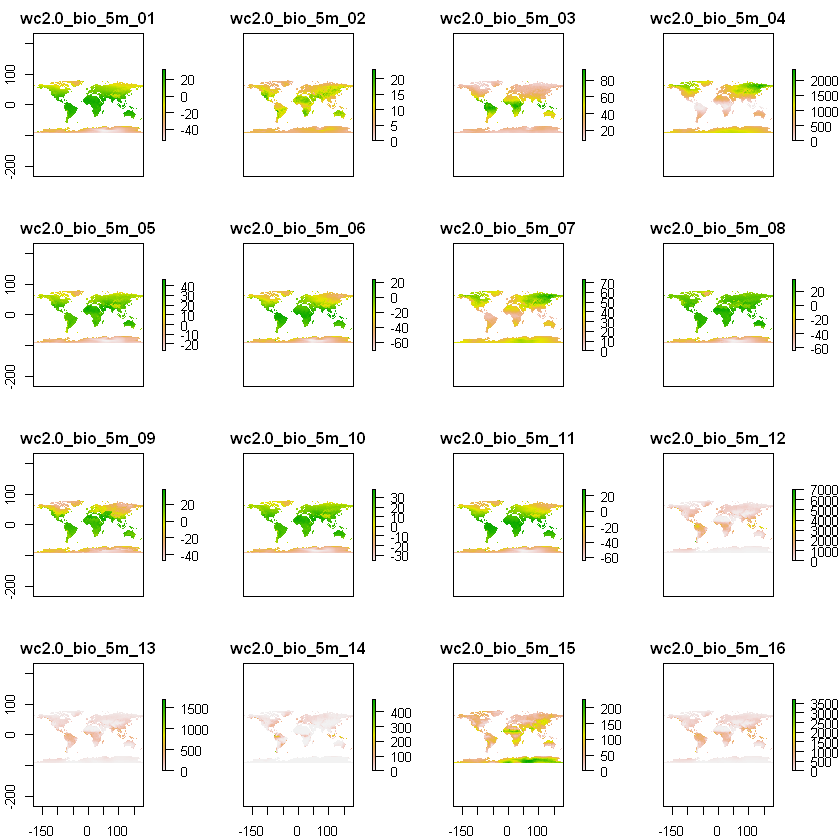

In [198]:
#Here needs to print nicely all of the environmental data:
plot(env)

In [199]:
clipped_env<-crop(env, extent(china), snap="in")
masked_env<-mask(clipped_env, china)

In [209]:
path2layers<-"data\\environmental\\clipped\\"
writeRaster(clipped_env,filename=paste(path2layers,names(clipped_env),sep=""),format="GTiff", overwrite=TRUE,bylayer=TRUE)

path2layers<-"data\\environmental\\china\\"
writeRaster(masked_env,filename=paste(path2layers,names(masked_env),sep=""),format="GTiff", overwrite=TRUE,bylayer=TRUE)

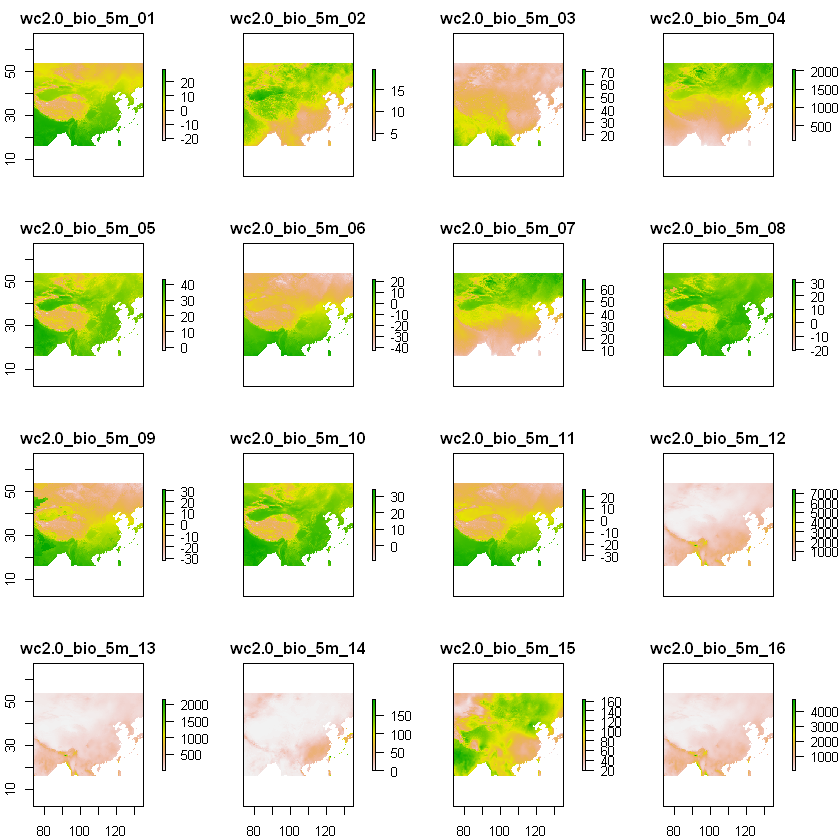

In [202]:
plot(clipped_env)

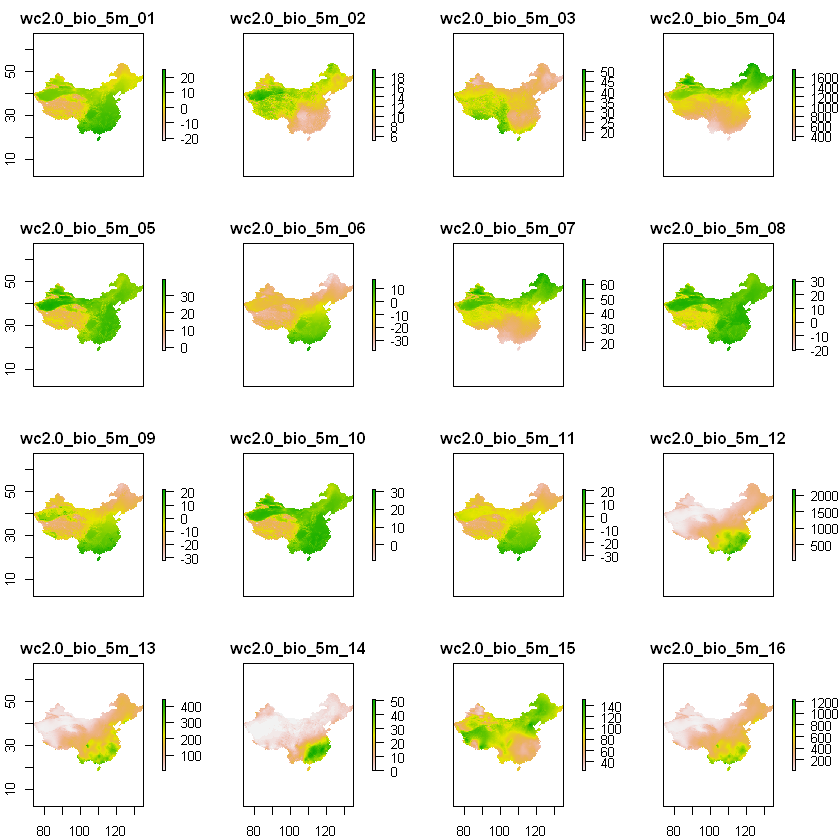

In [203]:
plot(masked_env)